<a href="https://colab.research.google.com/github/nanodu2604/Numerical/blob/Math-small-tests-use-for-this-project/Numerical_Analysis_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="lightgreen"> Numerical analysis


# <font color="red"> System input processing after entering the function and interval<font>

In [ ]:
import math
import numpy as np
class Test:
  num_token=None
  interval_token=None
  def __init__(self,expression,interval):
    self.expression=expression
    self.interval=interval
    self._tokenize()
  def f(self,x):
    return eval(self.expression)
  def _tokenize(self):
    tokens=list(self.interval)
    self.num_token=(float(tokens[1]),float(tokens[-2]))
    self.interval_token=(tokens[0],tokens[1])
  def check_interval(self,n):
    if self.interval_token[0]=="[" and self.num_token[0]>n:
      return False
    if self.interval_token[0]=="(" and self.num_token[0]>=n:
      return False
    if self.interval_token[1]=="]" and self.num_token[1]<n:
      return False
    if self.interval_token[1]==")" and self.num_token[1]<=n:
      return False
    return True
  def get_a(self):
    return self.num_token[0]
  def get_b(self):
    return self.num_token[1]

# Test some methods

In [ ]:
expresion=input("Please type a function: \n")
interval=input("Please type the interval:\n")
t=Test(expresion,interval)

Please type a function: 
x+4
Please type the interval:
(3,5)


In [ ]:
t.check_interval(3.5)
t.f(4)
t.get_a()

0.0

# <font color="lightgreen"> 1.Bisection method </font>

In [ ]:
expresion=input("Please type a function: \n")
interval=input("Please type the interval:\n")
t=Test(expresion,interval)

In [ ]:
def bisect(f,a,b,tol):
    i=1
    while tol<=((b-a)/2):
        p=(a+b)/2
        if (f(a)*f(p)>0) and (f(b)*f(p)<0):
            a=p
        elif (f(p)*f(b)>0) and (f(a)*f(p)<0):
            b=p
        elif (f(p)*f(b)==0):
            return p
        i+=1
    return p,i

In [ ]:
bisect(t.f,t.get_a(),t.get_b(),10**-6)

## <font color="cyan">2. Fixed point method




In [ ]:
expresion=input("Please type a function: \n")
interval=input("Please type the interval:\n")
t=Test(expresion,interval)

In [ ]:
def fixpoint(f, N, tol, p0,a,b):
    i = 1
    while i <= N:
        p = f(p0)
        print(p)
        if t.check_interval(p):
          print(f"Method yield no root in [{a},{b}]")
          return None
        if abs(p - p0) < tol:
            print(f"Process successful within {i} iterations")
            return p  # return p instead of p0
        else:
            p0 = p
            i += 1
    print("Method fails")
    return None

In [ ]:
fixpoint(f=t.f,N=20,tol=10**(-6),p0=1,a=t.get_a(),b=t.get_b())

-1
5
Method yield no root in [1.0,2.0]


## <font color="cyan">2. Newton method


In [ ]:
class Data_test:
  def __init__(self,expression,x:list,y:list):
    if y==None:
      f=lambda x:eval(expression)
      y=[f(i) for i in x]
    if expression==None:
    self.y=y
    self.x=x

SyntaxError: invalid syntax (<ipython-input-3-8fb11316090f>, line 2)

 ## <font color="cyan">3. Lagrange interpolation method </font>

In [ ]:
expresion=input("Please type a function: \n")
interval=input("Please type the interval:\n")
t=Test(expresion,interval)

Please type a function: 
(math.e)**x
Please type the interval:
[0,2]


In [ ]:
#work with data frame


In [ ]:
# Lagrange interpolation is used by Vandermonde instead:
def vandermonde(sols:list):
  mat=[]
  for e in sols:
    row=[1]
    for i in range(1,len(sols)):
      row.append(e**i)
    mat.append(row)
  return np.array(mat)

In [ ]:
def interpolation_polynomial(x:list,y=None):
  if y is None:
    y=[]
  for i in (x):
    y.append(t.f(i))
  arr_x=vandermonde(x)
  arr_y=np.array(y)
  inverse_x = np.linalg.inv(arr_x)
  return np.flip(inverse_x@arr_y)

In [ ]:
print(np.poly1d(interpolation_polynomial([0,1,2])))

       2
1.476 x + 0.242 x + 1


In [ ]:
x=np.linspace(t.get_a(),t.get_b(),1000)
y=np.polyval(interpolation_polynomial([0,0.6,0.9]),x)
y1=np.array(list(map(lambda x:t.f(x),x)))

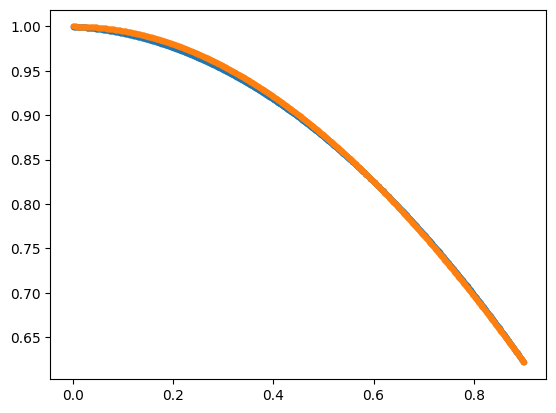

In [ ]:
import matplotlib.pyplot as plt
plt.plot(x,y,".-")
plt.plot(x,y1,".-");

:$$x=16(\sin(t))^3$$
$$y= 13\cos{t} - 5\cos{2t} - 2.0\cos{3t} - \cos{4t}$$